In [87]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

%matplotlib inline

In [88]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [89]:
#loading the dataset
price_df = pd.read_excel('C:\\Users\\Anand\\Downloads\\oil_exxon.xlsx')

#making date column to be the index
price_df.index= pd.to_datetime(price_df['date'])


#dropping the old date column
price_df = price_df.drop(['date'],axis=1)
price_df.head()

,exon_price,oil_price
date,,
2014-03-28,97.699997,106.64
2014-03-31,97.680000,105.95
2014-04-01,97.730003,105.70
2014-04-02,97.949997,103.37
2014-04-03,97.930000,104.88


## cleaning the data

In [90]:
#check the datatypes of the columns
price_df.dtypes

exon_price    float64
oil_price     float64
dtype: object

In [91]:
print(price_df.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1256 entries, 2014-03-28 to 2019-03-25
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   exon_price  1256 non-null   float64
 1   oil_price   1248 non-null   float64
dtypes: float64(2)
memory usage: 29.4 KB
None


In [92]:
print(price_df.shape)

(1256, 2)


In [93]:
#fixing the mistakes in the dataset
# 1. renaming of exon_price to exxon_price
price_df.rename(columns={'exon_price':'exxon_price'},inplace=True)
price_df.head()

,exxon_price,oil_price
date,,
2014-03-28,97.699997,106.64
2014-03-31,97.680000,105.95
2014-04-01,97.730003,105.70
2014-04-02,97.949997,103.37
2014-04-03,97.930000,104.88


In [94]:
#we can make a new df to see where the NULL values are present
null_values=price_df[price_df.isna().any(axis=1)]
null_values

,exxon_price,oil_price
date,,
2015-08-31,75.239998,NaN
2016-12-27,90.750000,NaN
2017-12-26,83.980003,NaN
2018-04-02,73.220001,NaN
2018-05-07,77.739998,NaN
2018-12-24,65.510002,NaN
2018-12-26,68.639999,NaN
2018-12-31,68.190002,NaN


In [95]:
#we can change the NaN values to some actual data
#price_df.loc[['2015-08-31','2016-12-27'],'oil_price'] = 109.45
#price_df.loc['2016-12-27']

In [102]:
# 2.checking for null values
display(price_df.isna().any())
#price_df.isna().sum())

#either can place certain values in place of NaN or drop those values and since this is a single attribute dataset, we will 
# drop the NaN values

price_df=price_df.dropna()
#print(price_df.shape ) -> (1248,2)
display(price_df.isna().any())

exxon_price    False
oil_price      False
dtype: bool

(1248, 2)


exxon_price    False
oil_price      False
dtype: bool

## Exporatory Data Analysis

<AxesSubplot:title={'center':'Exxon vs Oil'}, xlabel='exxon_price', ylabel='oil_price'>

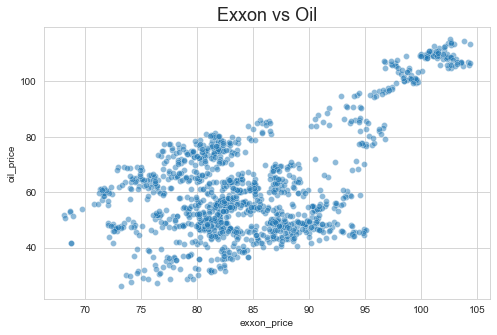

In [111]:
plt.figure(figsize=(8,5))
sns.set_style('whitegrid')
plt.title('Exxon vs Oil',fontsize=18)
sns.scatterplot(x='exxon_price',y='oil_price',data=price_df,alpha=0.5)

In [ ]:
#there is definately a relationship between exxon_price and oil_price

<AxesSubplot:>

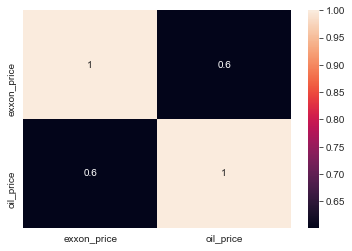

In [112]:
#Measure the corelation
sns.heatmap(price_df.corr(),annot=True)

#### we can see that the corelation between oil_price and exxon_price is a pretty strong relationship

In [114]:
#statistical summary
price_df.describe()

,exxon_price,oil_price
count,1248.000000,1248.000000
mean,84.802796,61.935000
std,7.424687,19.288424
min,68.120003,26.010000
25%,80.190002,48.162500
50%,83.024998,57.120000
75%,88.529999,70.725000
max,104.379997,115.190000


## checking for outliers and skewness


array([[<AxesSubplot:title={'center':'exxon_price'}>,
        <AxesSubplot:title={'center':'oil_price'}>]], dtype=object)

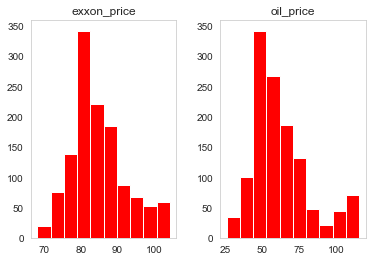

In [123]:
price_df.hist(grid = False, color = 'r')

In [128]:
from scipy import stats
from scipy.stats import kurtosis,skew

#calculate the kurtosis using fisher method
exxon_kurtosis = kurtosis(price_df['exxon_price'],fisher=True)
oil_kurtosis = kurtosis(price_df['oil_price'],fisher=True)

#calculating the skewness
exxon_skewness = skew(price_df['exxon_price'])
oil_skewness = skew(price_df['oil_price'])

#kurtosis 
print("Exxon kurtosis : {:.4}".format(exxon_kurtosis))
print("Oil kurtosis : {:.4}".format(oil_kurtosis))

print("Exxon skewness : {:.2}".format(exxon_skewness))
print("Oil skeweness : {:.2}".format(oil_skewness))

#If skewness < −1 or > than +1, the distribution is highly skewed.
#If skewness is between −1 and −½ or between +½ and +1, the distribution is moderately skewed.
#If skewness is between −½ and +½, the distribution is approximately symmetric.

#our oil_price is highly skewed and exxon_price is moderately skewed

Exxon kurtosis : 0.08839
Oil kurtosis : 0.5321
Exxon skewness : 0.66
Oil skeweness : 1.0


## build the model

In [132]:
#splitting the dataset
X = price_df[['oil_price']]
y = price_df.drop('oil_price',axis=1)  #Y is the target variable

#splitting into training and testing instance in 80-20 ratio
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [134]:
#create and fit the data
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [142]:
intercept = model.intercept_[0]
coefficient = model.coef_[0][0] #double array
print("The coefficient of our model is {:.2}".format(coefficient))
print("The intercept of our model is {:.4}".format(intercept))

The coefficient of our model is 0.23
The intercept of our model is 70.55


In [146]:
#taking predictions

#1. taking a single prediction
prediction = model.predict([[76.43]])
predicted_value=prediction[0][0]
print("The predicted value is {:.4}".format(predicted_value))

#if the oil price is 76.43 then the prediction is that the Exxon stock value will be 88.09

The predicted value is 88.09


In [148]:
#taking multiple predictions
y_pred = model.predict(X_test)

y_pred[:5]

array([[82.39718427],
       [83.0168246 ],
       [81.66738567],
       [79.18882438],
       [84.12070236]])

## Evaluation of the model
### Model fit

In [153]:
import math
# calculate the mean squared error.
model_mse = mean_squared_error(y_test, y_pred)

# calculate the mean absolute error.
model_mae = mean_absolute_error(y_test, y_pred)

# calulcate the root mean squared error
model_rmse =  math.sqrt(model_mse)

# display the output
print("MSE = {:.4}".format(model_mse))
print("MAE = {:.4}".format(model_mae))
print("RMSE = {:.4}".format(model_rmse))

MSE = 38.75
MAE = 5.05
RMSE = 6.225


In [155]:
#R squared metric helps measure the goodness of fit or how well our data fits the model. Higher R-squared value,better the data fit the model
model_r2 = r2_score(y_test, y_pred)
print("R2: {:.2}".format(model_r2))

R2: 0.36


## Plotting the regression line

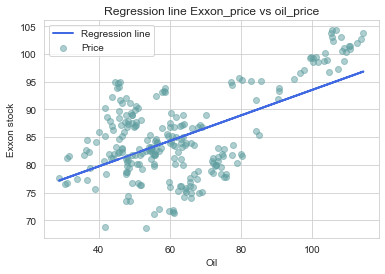

In [158]:
#first the scatterplot of the test dataset
plt.scatter(X_test,y_test,color='cadetblue',label='Price',alpha=0.5)
plt.plot(X_test,y_pred,color='royalblue',label='Regression line',linewidth=2,linestyle='-')

plt.title("Regression line Exxon_price vs oil_price")
plt.xlabel("Oil")
plt.ylabel("Exxon stock")
plt.legend()
plt.show()
